<a href="https://colab.research.google.com/github/MertYuksek/Add-2-Numbers-With-DL/blob/main/addTwoNumbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm

In [18]:
# create data
N = 2000
data = torch.randint(low=-10,high=11,size=(N,2)).float()
labels = torch.sum(data,axis=1,keepdim=True)

In [19]:
# design the model

def createADDmodel():

  ADDclassify = nn.Sequential(
      nn.Linear(2,30),
      nn.ReLU(),
      nn.Linear(30,1),
      nn.ReLU(),
      nn.Linear(1,1)
  )

  losfun = nn.MSELoss();
  optimizer = torch.optim.Adam(ADDclassify.parameters(), lr=.01)

  return ADDclassify,losfun,optimizer

In [20]:
# a function that trains the model

# a fixed parameter
numepochs = 10

def trainTheModel(ADDmodel):

  # initialize losses
  losses = torch.zeros(numepochs)

  # loop over epochs
  for epochi in range(numepochs):

    numloss = []
    # loop through "minibatches" of N=1
    for num,ans in zip(data,labels):

      # forward pass
      yHat = ADDmodel(num)

      # compute loss
      loss = lossfun(yHat,ans)
      numloss.append(loss.item())

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  
  losses[epochi] = np.mean(numloss)
  
  
  # final forward pass
  with torch.no_grad():
    predictions = ADDmodel(data)
  
  # compute the predictions and report accuracy (is this really different from loss?)
  trainacc = 100*torch.mean( (np.abs(predictions-labels)<1).float() ) # <1 for rounding


  ### now test with new data!
  # create brand new test data
  TESTdata = torch.randint(low=-10,high=11,size=(N,2)).float()
  TESTlabels = torch.sum(TESTdata,axis=1,keepdim=True)
  
  # evaluate the model and compute accuracy
  with torch.no_grad():
    predictions = ADDmodel(TESTdata)
  testacc = 100*torch.mean( (np.abs(predictions-TESTlabels)<1).float() )
  
  # EOF
  return losses,trainacc,testacc,ADDmodel

In [21]:
# test the model once to make sure it runs
AddingMachine,lossfun,optimizer = createADDmodel()
losses,trainacc,testacc,ADDmodel = trainTheModel(AddingMachine)

# print the results
trainacc,testacc
# losses

(tensor(8.8500), tensor(8.6000))

In [22]:
# run the model 10 times to check reproducibility

for i in range(10):

  # create a new 'machine' and train it
  AddingMachine,lossfun,optimizer = createADDmodel()
  _,trainacc,testacc,ADDmodel = trainTheModel(AddingMachine)

  # report accuracy
  print('Model instance %s, final TRAIN/TEST accuracies: %g%%, %g%%' %(i+1,trainacc,testacc))

Model instance 1, final TRAIN/TEST accuracies: 99.75%, 99.9%
Model instance 2, final TRAIN/TEST accuracies: 8.85%, 8.45%
Model instance 3, final TRAIN/TEST accuracies: 99.75%, 99.65%
Model instance 4, final TRAIN/TEST accuracies: 99.75%, 99.8%
Model instance 5, final TRAIN/TEST accuracies: 99.8%, 99.85%
Model instance 6, final TRAIN/TEST accuracies: 99.8%, 99.7%
Model instance 7, final TRAIN/TEST accuracies: 8.85%, 8.7%
Model instance 8, final TRAIN/TEST accuracies: 8.85%, 9.25%
Model instance 9, final TRAIN/TEST accuracies: 99.75%, 99.9%
Model instance 10, final TRAIN/TEST accuracies: 99.75%, 99.65%


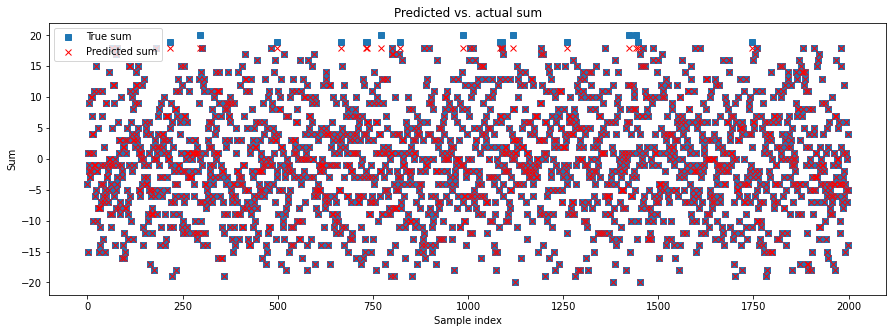

In [23]:
# some plots from the final model

data = torch.randint(low=-10,high=11,size=(N,2)).float()
labels = torch.sum(data,axis=1,keepdim=True)

# evaluate the model and compute accuracy
with torch.no_grad():
  predictions = ADDmodel(data)


# true and predicted values
fig = plt.figure(figsize=(15,5))
plt.plot(labels,'s')
plt.plot(np.round(predictions.detach()),'rx')
plt.legend(['True sum','Predicted sum'])
plt.xlabel('Sample index')
plt.ylabel('Sum')
plt.title('Predicted vs. actual sum')
plt.show()